<a href="https://colab.research.google.com/github/sandrarairan/TUTORIAL-CLASIFICACI-N-DE-IM-GENES-CON-EL-VISION-TRANSFORMER-EN-PYTORC/blob/main/Tutorial_clasificacion_con_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUTORIAL: CLASIFICACIÓN DE IMÁGENES CON EL "VISION TRANSFORMER" EN PYTORCH

En este tutorial básico veremos cómo usar el modelo "Vision Transformer" pre-entrenado para generar predicciones (clasificación) sobre imágenes propias.

Contenido:

1. Breve repaso: ¿qué es el Vision Transformer (ViT)?
2. El ViT en detalle
3. ¿Cómo pre-procesar una imagen?
4. Clasificando imágenes con el ViT pre-entrenado

## 1. Breve repaso: ¿qué es el Vision Transformer (ViT)?

Video sugerido: [El Vision Transformer ¡EXPLICADO!](https://youtu.be/A-6DF9mkDuQ)

En esencia:

> El ViT es un tipo de Red Transformer que permite procesar imágenes. Para esto subdivide la imagen de entrada en recuadros o "patches" y luego procesa dichos recuadros como si fuesen una secuencia, similar al texto.

- 🟢 El ViT es una alternativa al procesamiento de imágenes con Redes Convolucionales y ha demostrado tener un desempeño similar en tareas como la clasificación
- 🟡 El ViT dio origen a otros modelos, basados en Redes Transformer, para realizar tareas de detección de objetos o segmentación
- 🔴 La desventaja con respecto a una Red Convolucional es que el ViT requiere muchos más datos de entrenamiento y es un modelo generalmente mucho más grande (muchos más parámetros)

## 2. El ViT en detalle

El modelo pre-entrenado puede ser usado en TensorFlow/Keras o en PyTorch. En este tutorial veremos esta segunda opción.

Comencemos instalando la librería "transformers" de Hugging Face:

In [ ]:
# Instalar librería transformers de Hugging Face
!pip install transformers

Y ahora podemos cargar el modelo base (también están disponibles los modelos "large" y "huge"):

In [ ]:
# Cargar modelo pre-entrenado para clasificación
from transformers import ViTForImageClassification

modelo = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

El modelo fue entrenado con el set ImageNet-21K 14 millones de imágenes y 21.000 categorías y luego afinado con el set ImageNet-1K que contiene 1.28 M de imágenes y 1.000 diferentes categorías.

Veamos algunas características del modelo:



In [ ]:
# Arquitectura
print(modelo)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
# Número de parámetros
params_totales = sum(p.numel() for p in modelo.parameters())
params_entr = sum(p.numel() for p in modelo.parameters() if p.requires_grad)
params_no_entr = params_totales - params_entr

print(f"Parámetros totales: {params_totales}")
print(f"Parámetros entrenables: {params_entr}")
print(f"Parámetros NO entrenables: {params_no_entr}")

Parámetros totales: 86567656
Parámetros entrenables: 86567656
Parámetros NO entrenables: 0


In [ ]:
# Tamaño de las imágenes de entrada al modelo
print(modelo.config.image_size)

224


In [ ]:
# Tamaño de los recuadros ("patches")
modelo.config.patch_size

16

In [ ]:
# Categorías en las cuales puede ser clasificada una imagen
modelo.config.num_labels

1000

In [ ]:
# Categorías
modelo.config.id2label

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

## 3. ¿Cómo pre-procesar una imagen?

Como en toda Red Neuronal, en el caso del ViT debemos pre-procesar las imágenes antes de clasificarlas con el modelo pre-entrenado.

Este pre-procesamiento consiste en:

1. Redimensionar la imagen al tamaño 224x224 (y 3 canales, RGB)
2. Escalar los valores de los pixeles para que en lugar de 0-255 estén en el rango de -1 a 1

En el caso de PyTorch y de la librería "transformers" es muy sencillo hacer este pre-procesamiento.

Primero debemos cargar el procesador:

In [ ]:
from transformers import ViTImageProcessor

procesador = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Este procesador permitirá realizar, con pocas líneas de código, todo el pre-procoesamiento mencionado anteriormente.

Leamos una imagen y veamos sus características:

(1024, 1024)
('R', 'G', 'B')
((0, 255), (0, 255), (0, 255))


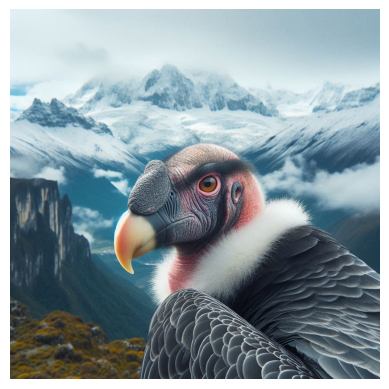

In [ ]:
# Leer imagen
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('/content/aves.jpg')

# Imprimir características de la imagen
print(image.size)
print(image.getbands())
print(image.getextrema())

# Mostrar imagen
plt.imshow(image)
plt.axis('off');

Para pre-procesar la imagen simplemente la usamos como argumento del procesador que acabamos de crear y usamos además el argumento "return_tensors="pt"" para que la imagen pre-procesada sea retornada en formato de Tensor de Pytorch:

In [ ]:
# Pre-procesar imagen
x = procesador(image, return_tensors="pt") # batch x canales x alto x ancho

# Características del tensor resultante
print(x.pixel_values.shape)
print(x.pixel_values.min(), x.pixel_values.max())

torch.Size([1, 3, 224, 224])
tensor(-0.9451) tensor(0.9843)


## 4. Clasificando imágenes con el ViT pre-entrenado

La clasificación es muy sencilla:

1. Primero activamos el modo "predicción" en PyTorch ("torch.no_grad()")
2. Luego presentamos al modelo la imagen pre-procesada
3. Como resultado obtendremos la predicción en el espacio logits
4. Finalmente, tomamos el vector de logits predicho y obtenemos la categoría correspondiente

Veamos cada uno de estos pasos:

In [ ]:
# Predicción en espacio logits
import torch

with torch.no_grad():
  logits = modelo(**x).logits

print(logits.shape)
print(logits)


torch.Size([1, 1000])
tensor([[ 8.4513e-01,  1.9028e+00,  1.4440e+00,  1.2410e+00,  4.2086e-01,
          1.2506e+00, -4.2008e-01,  2.1448e+00,  2.3911e+00,  1.5500e+00,
          2.0569e+00, -5.2248e-01,  1.5331e+00,  1.5182e+00,  4.4289e-01,
          1.2932e+00,  2.3053e+00,  1.3959e+00,  3.3096e+00,  1.0579e+00,
          9.1445e-01,  6.3086e+00,  4.6387e+00,  1.2548e+01,  4.3160e+00,
          5.7836e-01,  7.1345e-01,  1.3070e-01,  7.6589e-02,  1.9848e+00,
          4.8284e-01, -4.6345e-01,  7.1882e-01,  1.6600e+00,  2.0615e+00,
          1.7345e+00,  1.2475e+00,  7.8834e-01,  1.4773e+00,  1.5913e+00,
         -3.7525e-02,  1.2207e+00,  1.3655e+00,  5.9826e+00,  6.2260e-01,
          4.9843e-01, -4.8269e-01,  1.9498e+00,  1.0287e+00,  4.1941e-01,
          1.9885e-01,  1.2997e+00,  4.9725e-01, -8.1327e-02, -6.8966e-01,
         -4.5284e-01, -1.1595e+00, -7.5700e-01, -1.6714e-01, -1.7507e-01,
         -8.5004e-01, -5.7477e-01,  7.8277e-01,  5.8558e-01,  2.0153e-01,
          1.7187

Para encontrar la categoría a partir del vector logits simplemente buscamos la posición del máximo de este vector:

In [ ]:
# Predecir categoría a partir de los logits
bird_num = logits.argmax(-1).item()
print(bird_num)

23


Y para facilitar la interpretación del resultado podemos convertir esta categoría numérica a su representación en formato *string* usando el diccionario "id2label" disponible en "modelo.config":

In [ ]:
# Convertir categoría numérica a string
bird_str = modelo.config.id2label[bird_num]
print(bird_str)

vulture


Para facilitar todo lo anterior podemos crear la función "predecir" que combina todos los pasos anteriores:

In [ ]:
# Crear función para generar predicciones
def predecir(modelo, processor, ruta_img):
    # Leer imagen
    image = Image.open(ruta_img)

    # Pre-procesar imagen
    x = processor(image, return_tensors="pt")

    # Predicción
    with torch.no_grad():
        logits = modelo(**x).logits

    bird_num = logits.argmax(-1).item()
    bird_str = modelo.config.id2label[bird_num]

    # Mostrar imagen original y categoría predicha
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Categoría predicha: {bird_str}")

Y ahora sí podemos presentar diferentes imágenes al modelo pre-entrenado y generar las predicciones correspondientes:

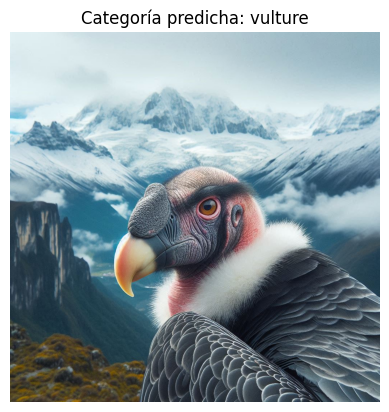

In [ ]:
predecir(modelo, procesador, '/content/aves.jpg')

The Andean condor (Vultur gryphus) is a South American New World vulture and is the only member of the genus Vultur. It is found in the Andes mountains and adjacent Pacific coasts of western South America. With a maximum wingspan of 3.3 m (10 ft 10 in) and weight of 15 kg (33 lb), the Andean condor is one of the largest flying birds in the world, and is generally considered to be the largest bird of prey in the world.
https://en.wikipedia.org/wiki/Andean_condor